In [1]:
import pandas as pd
# read csv file
df=pd.read_csv("diabetes.csv")
#display first five data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

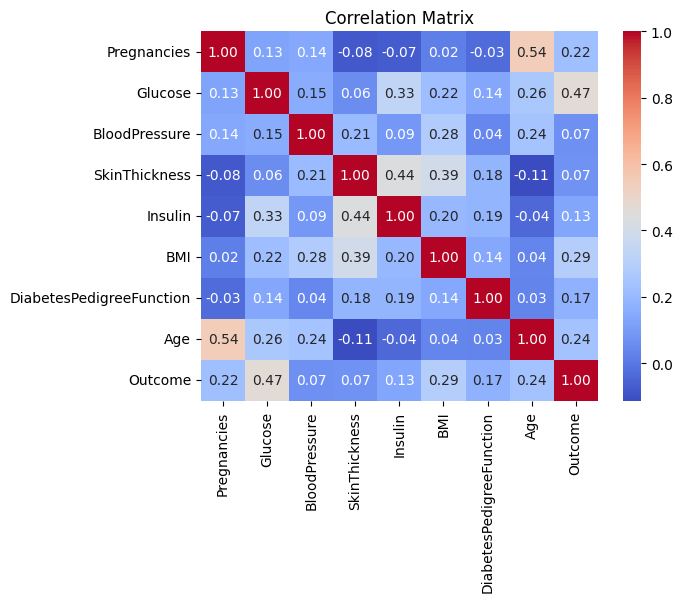

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Display correlation matrix heatmap for numerical variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
# finding missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

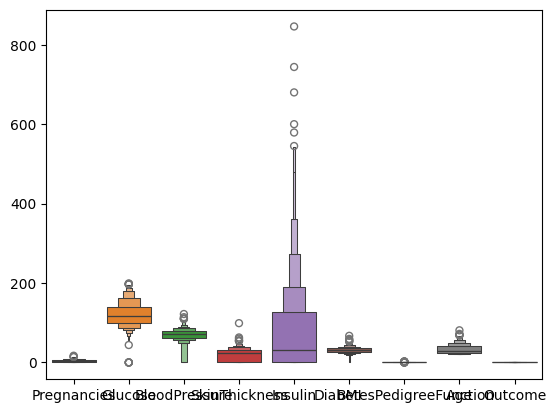

In [8]:
# finding outliers and removing that
sns.boxenplot(df)

In [9]:
from scipy.stats import zscore
# Calculate Z-scores for each column
z_scores = zscore(df)

# Define a threshold for Z-scores (e.g., 3 or -3)
threshold = 3

# Identify outliers based on Z-scores
outliers = (abs(z_scores) > threshold).any(axis=1)

# Display rows with outliers
print("Rows with Outliers:")
print(df[outliers])

Rows with Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
695            7      142             90             24      480  30.4   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  

In [10]:
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = zscore(df)

# Define a threshold for Z-scores (e.g., 3 or -3)
threshold = 3

# Identify and remove outliers based on Z-scores
df_no_outliers = df[(abs(z_scores) <= threshold).all(axis=1)]

# Display the dataset after removing outliers
print("Dataset after removing outliers:")
print(df_no_outliers)


Dataset after removing outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   

In [11]:
df_no_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [12]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [13]:
#Independent and dependent features
X=df_no_outliers.drop("Outcome", axis=1)
y=df_no_outliers.Outcome

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [16]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42
# Split the dataset into a training set (80%) and a test set (20%)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=random_seed)

In [18]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

In [20]:
# Create a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [21]:
# Define hyperparameters and their potential values for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
# Use GridSearchCV for hyperparameter tuning and cross-validation

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)



Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [27]:
# Train a decision tree model using the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [31]:
##Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [33]:
# prediction on the test set
y_pred = best_decision_tree.predict(X_test)

In [36]:
# Evaluate performance matrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall=  recall_score(y_test,y_pred)
f1 =f1_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(conf_matrix)




Accuracy: 0.73
Precision: 0.69
Recall: 0.55
F1 Score: 0.61
Confusion Matrix
[[72 13]
 [24 29]]


In [37]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_decision_tree.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

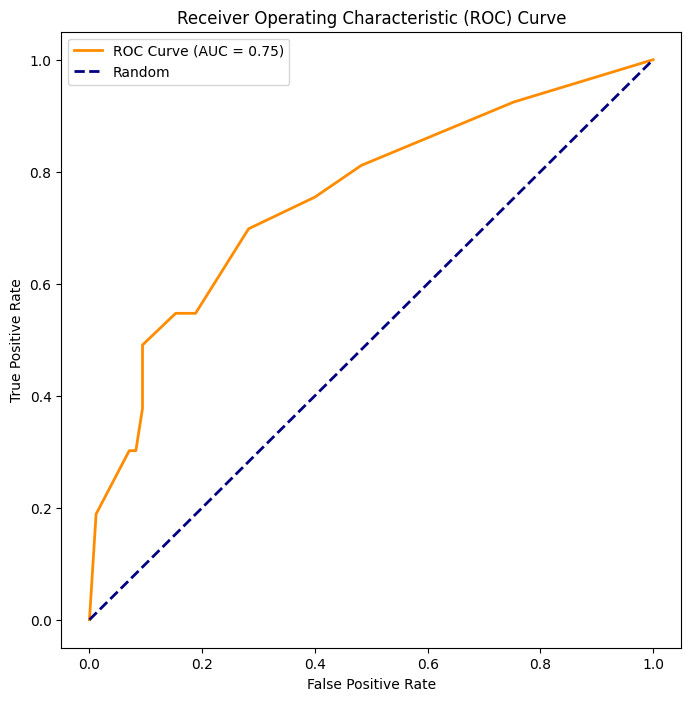

In [38]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

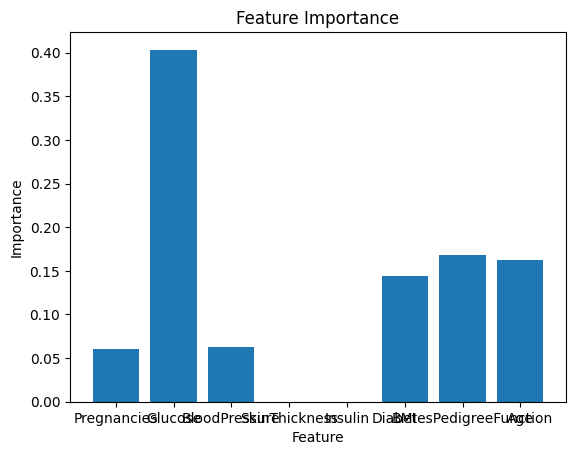

In [47]:
 #Display feature importance
feature_importance = best_decision_tree.feature_importances_
plt.bar(range(len(X.columns)), feature_importance)
plt.xticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [48]:
from sklearn.tree import export_graphviz
import graphviz

In [51]:
# Visualize the decision tree
from sklearn.tree import export_text

# Display the decision tree rules
tree_rules = export_text(best_decision_tree, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 114.50
|   |--- DiabetesPedigreeFunction <= 0.66
|   |   |--- BMI <= 26.45
|   |   |   |--- class: 0
|   |   |--- BMI >  26.45
|   |   |   |--- Age <= 35.50
|   |   |   |   |--- Pregnancies <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  6.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  35.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- class: 0
|   |--- DiabetesPedigreeFunction >  0.66
|   |   |--- Pregnancies <= 2.50
|   |   |   |--- Glucose <= 103.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  103.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.77
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.77
|   |   |   |   |   |--- class: 0
|   |   |--- Pregnancies >  2.50
|   |   |   |--- DiabetesPedigreeFunction <= 1.06
|   |   |   |   |--- BloodPressure <= 61.00
|   |   |   |   |   |--- class: 0

In [52]:
tree_rules = export_text(best_decision_tree, feature_names=list(X.columns), max_depth=3)
print(tree_rules)

|--- Glucose <= 114.50
|   |--- DiabetesPedigreeFunction <= 0.66
|   |   |--- BMI <= 26.45
|   |   |   |--- class: 0
|   |   |--- BMI >  26.45
|   |   |   |--- Age <= 35.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Age >  35.50
|   |   |   |   |--- truncated branch of depth 2
|   |--- DiabetesPedigreeFunction >  0.66
|   |   |--- Pregnancies <= 2.50
|   |   |   |--- Glucose <= 103.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  103.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Pregnancies >  2.50
|   |   |   |--- DiabetesPedigreeFunction <= 1.06
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- DiabetesPedigreeFunction >  1.06
|   |   |   |   |--- class: 1
|--- Glucose >  114.50
|   |--- Glucose <= 154.50
|   |   |--- BMI <= 26.30
|   |   |   |--- BloodPressure <= 59.00
|   |   |   |   |--- class: 0
|   |   |   |--- BloodPressure >  59.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- BMI >  26.30
| 

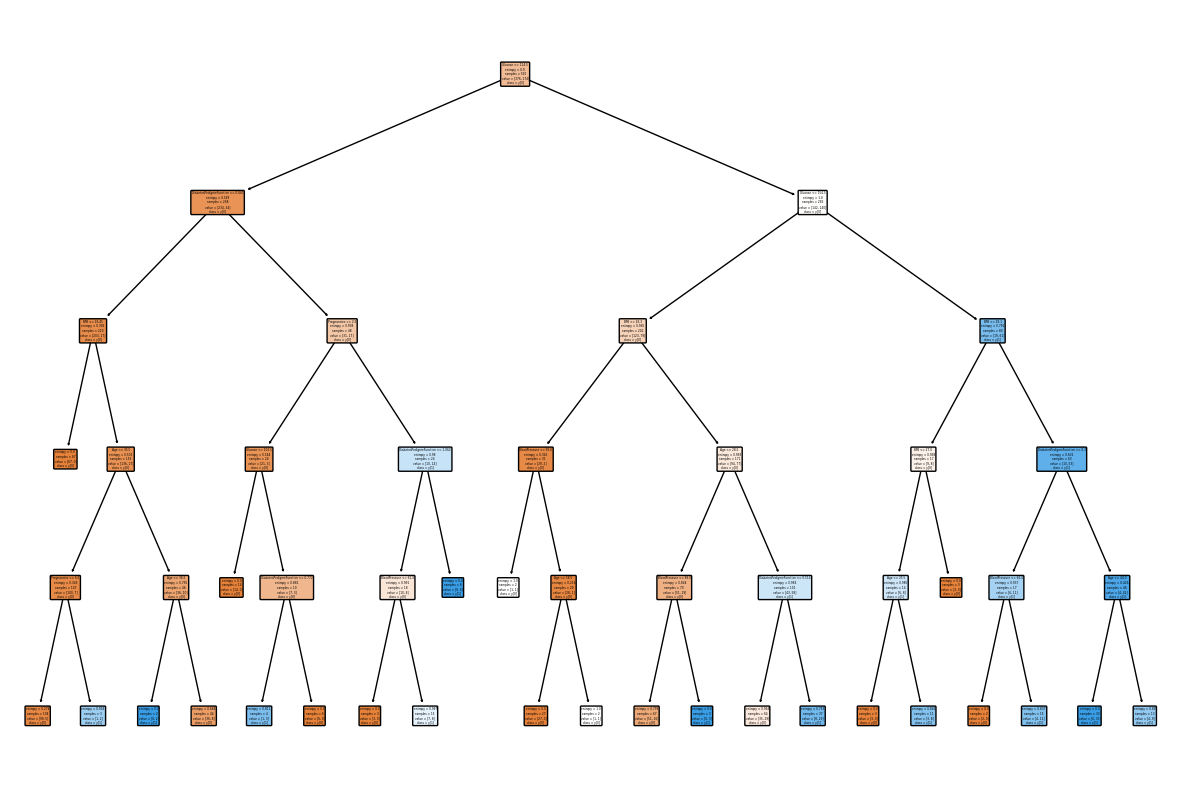

In [54]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(best_decision_tree, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()

In [56]:
## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [59]:
import numpy as np

# Holdout Test Set Evaluation
y_pred_test = best_decision_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Holdout Test Set Evaluation:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Confusion Matrix:")
print(conf_matrix_test)

# Cross-Validation
cv_scores = cross_val_score(best_decision_tree, X, y, cv=5)  # 5-fold cross-validation
print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Sensitivity Analysis
# Assume X_sensitivity contains the data points for sensitivity analysis
# Perturb features and observe the impact on predictions
X_sensitivity_perturbed = X_test.copy()
perturbation_strength = 0.1  # Example: 10% perturbation
X_sensitivity_perturbed *= np.random.uniform(1 - perturbation_strength, 1 + perturbation_strength, X_sensitivity_perturbed.shape)

y_pred_sensitivity = best_decision_tree.predict(X_test)
y_pred_sensitivity_perturbed = best_decision_tree.predict(X_sensitivity_perturbed)

print("\nSensitivity Analysis:")
print("Original Predictions:", y_pred_sensitivity)
print("Perturbed Predictions:", y_pred_sensitivity_perturbed)

# Scenario Testing
# Assume X_scenario contains data points for scenario testing
y_pred_scenario = best_decision_tree.predict(X_test)

print("\nScenario Testing:")
print("Predictions for Scenario Test Data:", y_pred_scenario)

Holdout Test Set Evaluation:
Accuracy: 0.7319
Confusion Matrix:
[[72 13]
 [24 29]]

Cross-Validation Scores:
[0.74637681 0.72463768 0.75362319 0.77372263 0.77372263]
Mean Cross-Validation Accuracy: 0.7544

Sensitivity Analysis:
Original Predictions: [1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0]
Perturbed Predictions: [0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0]

Scenario Testing:
Predictions for Scenario Test Data: [1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 